In [1]:
import torch
from torch import nn

from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor #converts images to tensors

import matplotlib.pyplot as plt


In [2]:
#getting dataset , here we are gonna use MNIST fashion datasets
train_data=datasets.FashionMNIST(
    root="data", #where to download
    train=True,#do we want training or testing dataset
    download=True,
    transform=ToTensor(),
    target_transform=None #defines how to transform how to transform labels
)

test_data= datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
#See the first training sample
image , label=train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_index=train_data.class_to_idx
class_to_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
image.shape , label #label doesnt have a shape, since its an integer 

(torch.Size([1, 28, 28]), 9)

color channel , height, width format here , greyscale has one color channel since its just black and white and in between 

torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

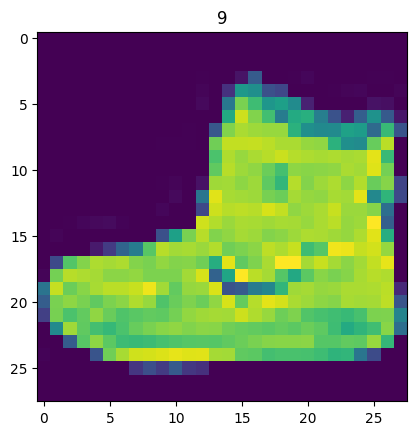

In [8]:
import matplotlib.pyplot as plt 
image, label= train_data[0]
print(image.shape)#shape error is very common
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

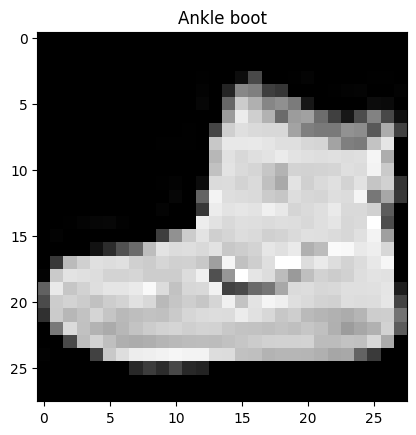

In [9]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])

14230
44968
31552
44542
47082
42575
14374
27493
1892
29208
45269
57261
51115
48298
39092
1262


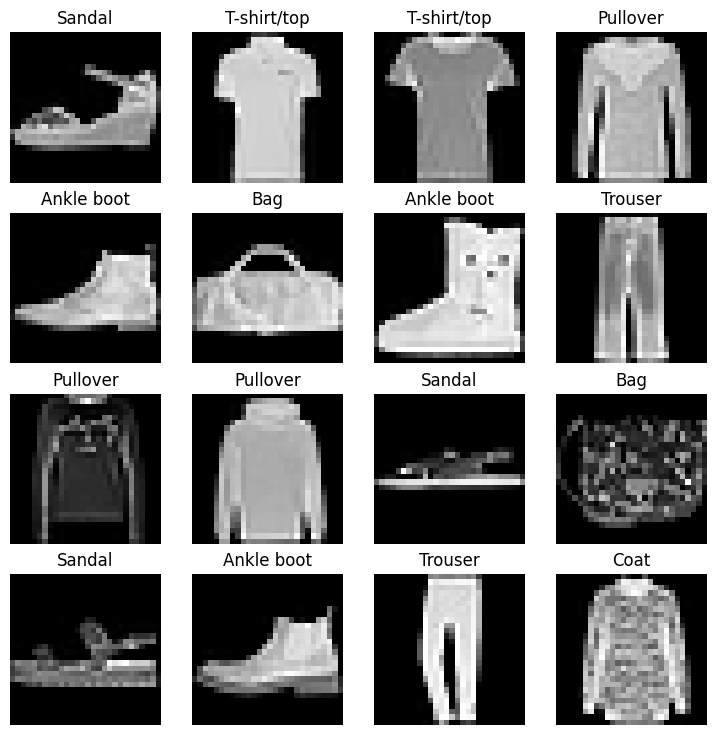

In [10]:
#random images now via imshow
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item()
    print(random_idx)
    img ,label= train_data[random_idx]
    fig.add_subplot(rows, cols , i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [11]:
#prepare a dataloader 
#right now data is in the form of a pytorch datasets
#dataloader turns tensor into a python iterable. basically we are turning data into batches and mini batches 

from torch.utils.data import DataLoader

#setup the batch size 
BATCH_SIZE= 32

#turn data sets into iterables(batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader= DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)#order doesnt matter in the test data , its more optimized to keep the shuffle off 

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x15ced4e6ba0>,
 <torch.utils.data.dataloader.DataLoader at 0x15ced4866c0>)

In [12]:
len(train_dataloader), len(test_dataloader) #numbers of batches created 


(1875, 313)

In [13]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size: torch.Size([1, 28, 28])
Label: 6 Label shape: torch.Size([])


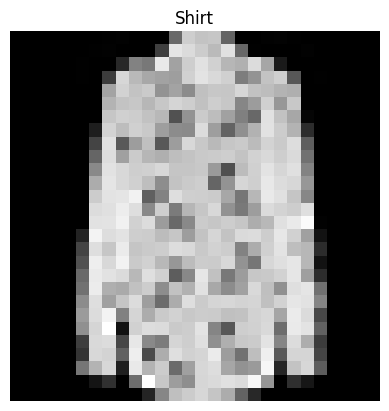

In [14]:
#show a sample 
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"image size: {img.shape}")
print(f"Label: {label} Label shape: {label.shape}")

=================== end of data loading part ===========================

In [15]:
#model0 , baseline mode 
#create flatter layer

flatten_model= nn.Flatten()

#Get a single sample 
x= train_features_batch[0]
x , x.shape

#Flatten the sample , does forward pass internally 
output=flatten_model(x)#performs forward pass 

print(f"shape before flattening : {x.shape} -> color channel , height , width")
print(f"shape after flatterning: {output.shape} -> color channel , height*width")

shape before flattening : torch.Size([1, 28, 28]) -> color channel , height , width
shape after flatterning: torch.Size([1, 784]) -> color channel , height*width


In [16]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [17]:
from torch import nn 
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self,x):
        return self.layer_stack(x)

In [18]:
torch.manual_seed(69)

#setup model with input parameters
model0=FashionMNISTModelV0(
    input_shape=784,#output of flatten is input here, i.e 28*28
    hidden_units=10, 
    output_shape=len(class_names)#one for every class 
).to("cpu")

model0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
#creating raw logits 
dummydat=torch.rand([1,1,28,28])
model0(dummydat)

tensor([[-0.0202, -0.2152,  0.5079,  0.0495, -0.3395,  0.1103,  0.4908,  0.2148,
          0.1127, -0.0960]], grad_fn=<AddmmBackward0>)

In [20]:
#loss optimizer setup 
#multiple class so cross entropy loss , optimier will be SGD 
#evaluation metric will be accuracy 

from helper_functions import accuracy_fn


#Setup loss function and optimizer 
loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.1)

In [21]:
#creating a function to time the experiments 
from timeit import default_timer as timer

def print_train_time(start:float,
                     end: float,
                     device:torch.device = None):
    '''prints difference between start and end time'''
    total_time=end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [22]:

start_time= timer()
#codeblock
end_time= timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


1.2899996363557875e-05

In [23]:
#creating training loop and training model on batches 
from tqdm.auto import tqdm

#set the seed and start the timer 
torch.manual_seed(69)
train_time_start_cpu = timer()

epochs = 3

#create training and test loop 

for epoch in tqdm(range(epochs)):
    print("Epoch: {epoch}\n --------")
    #training
    train_loss=0
    #add a loop to loop through training data 
    for batch, (X,y) in enumerate(train_dataloader):
        model0.train()
        #forward pass 
        y_pred = model0(X)
        #loss calc per batch 
        loss = loss_fn(y_pred,y)
        train_loss += loss #accumalation of training loss values of every batch

        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        #print progress
        if batch%400 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)})")
        
#divide total train loss by length of train dataloader
train_loss/=len(train_dataloader)
#testing
testloss, test_acc = 0,0
model0.eval()
with torch.inference_mode():
    for X,y in test_dataloader:
        #forward pass
        test_pred = model0(X)

        #calculate loss
        testloss+= loss_fn(test_pred,y)
    
        #calculate accuracy
        test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    #calculate the test loss average 
    testloss/=len(test_data)

    #test accuracy per batch
    test_acc /= len(test_dataloader)
#print
print(f"\n Train loss: {train_loss:.4f} | test loss: {testloss:.4f}, test acc: {test_acc:.4f}")
#calc train time 
train_time_end_on_cpu=timer()
total_train_time_model0= print_train_time(start=train_time_start_cpu,
                                          end=train_time_end_on_cpu,
                                          device=next(model0.parameters()).device)


c:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: {epoch}
 --------
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)


 33%|███▎      | 1/3 [00:05<00:10,  5.23s/it]

Epoch: {epoch}
 --------
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)


 67%|██████▋   | 2/3 [00:10<00:05,  5.20s/it]

Epoch: {epoch}
 --------
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)


100%|██████████| 3/3 [00:15<00:00,  5.16s/it]



 Train loss: 0.4525 | test loss: 0.0156, test acc: 82.2584
Train time on cpu: 16.088 seconds


In [24]:
#make predictions and get model0 results
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    '''returns a dictionary containing the results of model predicting on data_loader'''
    loss , acc =0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            #device agnostic code
            X,y=X.to(device),y.to(device)
            #make prediction
            y_pred=model(X)
            #accumulate the loss and acc values 
            loss+=loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        
        loss/=len(data_loader)
        acc /= len(data_loader)
    return{"model_name":model.__class__.__name__,
           "model_loss": loss.item(),
           "model_acc": acc}
model0_results=eval_model(model=model0,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)

model0_results

  0%|          | 0/313 [00:00<?, ?it/s]


NameError: name 'device' is not defined

In [ ]:
#device agnostic code 
device = "cuda" 
#model 1 : building model with non-linearity 

class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )

    def forward(self,x:torch.Tensor):
        return self.layer_stack(x)
    
torch.manual_seed(69)
model1=FashionMNISTModelV1(input_shape=784,
                           hidden_units=10,
                           output_shape=10).to(device)


In [ ]:
#setup loss optim and eval metric
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model1.parameters(),
                           lr=0.1)


In [ ]:
def train_step(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    '''performs a training step on model that uses dataloader'''
    train_loss,train_acc=0,0
    #training
    model.train()
    #add a loop to loop through training data 
    for batch, (X,y) in enumerate(data_loader):
        X,y=X.to(device),y.to(device)
        
        #forward pass 
        y_pred_logits = model(X)
        #loss calc per batch 
        loss = loss_fn(y_pred_logits,y)
        train_loss += loss #accumalation of training loss values of every batch
        train_acc+=accuracy_fn(y_true=y,
                                y_pred=y_pred_logits.argmax(dim=1))
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step() 
        #print progress
        if batch%400 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)})")
        
    #divide total train loss and accuracy by length of train dataloader
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    print(f"Train loss: {train_loss:.5f}| Train acc: {train_acc:.2f}%")


def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device= device):
    #testing
    testloss, test_acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y=X.to(device),y.to(device)
            #forward pass
            test_pred = model(X)

            #calculate loss/acc
            testloss+= loss_fn(test_pred,y)
            test_acc+= accuracy_fn(y_true=y,
                                   y_pred=test_pred.argmax(dim=1))#logits to prediction labels
        
        #calculate the test loss average 
        testloss/=len(test_data)
        #test accuracy per batch
        test_acc /= len(test_dataloader)
        #print
        print(f"\n Train loss: {train_loss:.4f} | test loss: {testloss:.4f}, test acc: {test_acc:.4f}%")

In [ ]:

#measure time
from timeit import default_timer as Timer
train_time_start_gpu=timer()

#set epochs
epochs=3


for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--")
    train_step(model=model1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model1,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)
    
train_time_end_on_gpu=timer()
total_train_time_model1=print_train_time(start=train_time_start_gpu,
                                         end=train_time_end_on_gpu,
                                         device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)
Train loss: 0.65396| Train acc: 75.16%


 20%|██        | 1/5 [00:05<00:23,  5.90s/it]


 Train loss: 0.4525 | test loss: 0.0227, test acc: 72.0547%
Epoch: 1
--
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)
Train loss: 0.63825| Train acc: 75.64%


 40%|████      | 2/5 [00:11<00:17,  5.84s/it]


 Train loss: 0.4525 | test loss: 0.0212, test acc: 74.4908%
Epoch: 2
--
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)
Train loss: 0.63011| Train acc: 75.81%


 60%|██████    | 3/5 [00:17<00:11,  5.74s/it]


 Train loss: 0.4525 | test loss: 0.0215, test acc: 74.2212%
Epoch: 3
--
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)
Train loss: 0.62262| Train acc: 76.10%


 80%|████████  | 4/5 [00:24<00:06,  6.45s/it]


 Train loss: 0.4525 | test loss: 0.0213, test acc: 74.0216%
Epoch: 4
--
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)
Train loss: 0.61717| Train acc: 76.27%


100%|██████████| 5/5 [00:33<00:00,  6.73s/it]


 Train loss: 0.4525 | test loss: 0.0215, test acc: 73.8419%
Train time on cuda: 33.652 seconds


In [ ]:
model1_results=eval_model(model=model1,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)
model1_results

100%|██████████| 313/313 [00:00<00:00, 461.92it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6853153705596924,
 'model_acc': 73.84185303514377}

In [28]:
#========================================================model2 , building a convolutional neural network=================================================

#creating a CNN

class FashionMNISTModelV2(nn.Module):
    def __init__(self,input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), #values we can set ourselves in our neural networks are called hyperparameters , these are hyperparameters of conv2d
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*0,
                      out_features=output_shape)
        )

    def forward(self,x):
        x=self.conv_block_1(x)
        print(x.shape)
        x= self.conv_block_2(x)
        print(x.shape)
        x=self.classifier(x)
        return x

In [29]:
image.shape


torch.Size([1, 28, 28])

In [30]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to("cuda")#because black and white images

c:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\.venv\Lib\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [31]:
torch.manual_seed(69)

#create a batch of images
images= torch.randn(size=(32,3,64,64))
test_image = image[0]

In [32]:
torch.manual_seed(69)
conv_layer = nn.Conv2d(in_channels=1,
                      out_channels=10,
                      kernel_size=(3,3),
                      stride=1,
                      padding=1)

# test_image shape: [28, 28], need to add batch and channel dimensions: [1, 1, 28, 28]
conv_output = conv_layer(test_image.unsqueeze(0).unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 28, 28])

In [36]:
#print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}\n unsqueezed: {test_image.unsqueeze(0).shape}")
#create sample maxpool
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass through conv 
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(test_image_through_conv.shape)

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"shape after going through conv layer and max pool: {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([28, 28])
 unsqueezed: torch.Size([1, 28, 28])
torch.Size([10, 28, 28])
shape after going through conv layer and max pool: torch.Size([10, 14, 14])
